В цьому домашньому завданні ми знову працюємо з даними з нашого змагання ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/t/7c080c5d8ec64364a93cf4e8f880b6a0).

Тут ми побудуємо рішення задачі класифікації з використанням Decision Trees і зробимо новий submission на змагання на Kaggle.

В цьому ДЗ ми працюємо без pipelines, бо так буде зручніше для візуалізації і інтерпретації моделі дерева прийняття рішень. Так буває і в робочих проєктах: іноді зручніше використати sklearn.Pipelines, іноді зручніше без них. На етапі пошуку рішення (research) зручніше без пайплайнів, а з пайплайнами - коли ви відлагодили процес обробки даних і хочете поекспериментувати з різними моделями і гіперпараметрами.

**Завдання 1.**

У попередньому домашньому завданні, `HW 2.7 Логістична регресія з scikit learn.ipynb`, ми писали обробку даних для змагання. Ваше завдання зараз - за прикладом, наведеним в лекції `Майстер-клас з перенесення коду з jupyter notebook у Python модуль`, перенести попередню обробку сирих даних з вашого розв'язку ДЗ 2.7 у файл `process_bank_churn.py` в функцію `preprocess_data(...)`.

Функція `preprocess_data()` має приймати `raw_df` і вертати `X_train`, `train_targets`, `X_val`, `val_targets`, `input_cols`(перелік назв колонок, які Ви використовуєте в X), `scaler`, `encoder`, які ми потім будемо використовувати для тренування дерева прийняття рішень.


### Кроки попередньої обробки:

1. Обираємо колонки для роботи. В цьому завдання для чистоти експериментів рекомендую прибрати колонку `Surname`, так буде простіше інтрепретувати модель. Ви можете її додати вже за самостійних подальших експериментів.
2. Розбиття сирих даних на тренувальні і валідаційні.
3. Обробка категоріальних даних (one hot encoding).
4. Масштабування числових даних (було частиною попередньої обробки в попередніх завданнях). Для дерев нам не обовʼязково масштабувати ознаки, тож в коді можна зробити цю частину опціональною, додавши в `preprocess_data` параметр `scaler_numeric`, який приймає значення `True` або `False`. Це дозволить використовувати код попередньоъ обробки з різними моделями.


### Інструкції:
1. Перенесіть попередню обробку даних у файл `process_bank_churn.py`.
2. Забезпечте модулярну структуру функцій: кожна функція повинна виконувати лише одну дію, наприклад, масштабувати ознаки.
3. Додайте докстрінги до кожної функції.
4. Використовуйте typing для аргументів та значень, що повертаються функціями.
5. Передбачте обробку нових даних. Додайте спеціальну функцію `preprocess_new_data(...)`, яка приймає на вхід нові дані в вигляді pandas DataFrame та використовує вже навчені скейлер та енкодер (передані теж як аргументи фукнціх) для їх обробки. Ця функція буде корисною для обробки нових даних перед передбаченням або оцінкою моделі, коли оброблятимемо `test.csv`.

Можна і рекомендовано виконувати це завдання з ChatGPT (бажано, новіше, ніж 3.5) як було наведено у відео-прикладі, тільки **ваше додаткове завдання - розібратись з кодом, який вам згенерувала мовна модель :)**.

## В результаті цього завдання

1. Завантажте ваш готовий `process_bank_churn.py` файл на GitHub у свій репозиторій.
2. Додайте посилання на файл в репозиторії тут у ноутбуці.
3. Нижче зробіть імпорт функції `preprocess_data` з вашого модуля `process_bank_churn.py`.



https://github.com/olslik/ML_tasks/blob/main/2_3_Decision_Trees/process_bank_churn.py

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!curl -o process_bank_churn.py https://raw.githubusercontent.com/olslik/ML_tasks/main/2_3_Decision_Trees/process_bank_churn.py

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  4694  100  4694    0     0  12626      0 --:--:-- --:--:-- --:--:-- 12720
100  4694  100  4694    0     0  12619      0 --:--:-- --:--:-- --:--:-- 12720


In [3]:
from process_bank_churn import preprocess_data

In [4]:
?preprocess_data

Signature:
preprocess_data(
    raw_df: pandas.core.frame.DataFrame,
    scale_numeric: bool = True,
) -> Dict[str, Any]
Docstring:
Prepares the dataset by applying preprocessing steps such as column dropping,
splitting by training/validation, feature scaling, and encoding.
File:      c:\users\olsli\documents\01_data_science\02_machine_learning\ml_hanna_pylieva\2_supervised_ml\2_3_decision_trees\process_bank_churn.py
Type:      function

In [5]:
raw_df = pd.read_csv('train.csv')
raw_df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15779985.0,Nwankwo,678.0,France,Male,29.0,4.0,0.00,3.0,1.0,0.0,180626.36,0.0
1,1,15650086.0,Ch'in,687.0,France,Female,34.0,1.0,0.00,2.0,0.0,1.0,63736.17,0.0
2,2,15733602.0,Thompson,682.0,France,Female,52.0,6.0,0.00,3.0,0.0,0.0,179655.87,1.0
3,3,15645794.0,Macleod,753.0,Germany,Male,44.0,6.0,83347.25,2.0,1.0,0.0,161407.48,0.0
4,4,15633840.0,Hsia,544.0,Germany,Female,55.0,0.0,107747.57,1.0,1.0,0.0,176580.86,1.0


In [6]:
data = preprocess_data(raw_df, True)
data

{'X_train':        CreditScore       Age  Tenure   Balance  NumOfProducts  HasCrCard  \
 9839      0.544153  0.357143     0.9  0.000000       0.000000        1.0   
 9680      0.682578  0.357143     0.6  0.000000       0.666667        1.0   
 7093      0.389021  0.339286     0.9  0.675933       0.333333        0.0   
 11293     0.553699  0.607143     0.1  0.519107       0.000000        1.0   
 820       0.472554  0.375000     0.7  0.379520       0.333333        1.0   
 ...            ...       ...     ...       ...            ...        ...   
 5191      0.377088  0.196429     0.8  0.722742       0.000000        1.0   
 13418     0.439141  0.232143     0.5  0.695885       0.333333        1.0   
 5390      0.649165  0.267857     0.1  0.557512       0.333333        1.0   
 860       0.396181  0.232143     1.0  0.590512       0.000000        1.0   
 7270      0.264916  0.410714     0.5  0.000000       0.000000        1.0   
 
        IsActiveMember  EstimatedSalary  Geography_France  Geog

In [7]:
X_train, y_train, X_val, y_val = data['X_train'], data['y_train'], data['X_val'], data['y_val']
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
9839,0.544153,0.357143,0.9,0.000000,0.000000,1.0,0.0,0.599413,0.0,0.0,1.0,1.0,0.0
9680,0.682578,0.357143,0.6,0.000000,0.666667,1.0,0.0,0.794887,1.0,0.0,0.0,1.0,0.0
7093,0.389021,0.339286,0.9,0.675933,0.333333,0.0,1.0,0.883878,0.0,1.0,0.0,1.0,0.0
11293,0.553699,0.607143,0.1,0.519107,0.000000,1.0,0.0,0.974078,0.0,1.0,0.0,0.0,1.0
820,0.472554,0.375000,0.7,0.379520,0.333333,1.0,1.0,0.423784,0.0,1.0,0.0,0.0,1.0


In [8]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((12000, 13), (12000,), (3000, 13), (3000,))

**Завдання 2.**
1. Натренуйте дерево прийняття рішень з зафіксованим `random_state` і з рештою аргументів за замовченням.
2. Виведіть area under ROC для моделі на тренувальних і тестувальних даних. Нам потрібна ця метрика, бо вона основна в змаганні. Модель ок, чи є пере- або недотренування?
3. Виведіть глибину дерева.
4. Побудуйте дерево до глибини 2 включно. Напишіть, які ознаки бачите, що є найвпливовішими тут?
5. Створіть датафрейм `importance_df` з feature importances, де в першому стовпчику `feature` - назва ознаки з нашого Х, а в другому `importance` - значення, наскільки ця ознака є важливою в побудованій моделі. Виведіть топ 10 найвпливовіших ознак разом з їх скором важливості (можна або у вигляді таблиці, або в вигляді barplot).

##### 2.1. Натренуйте дерево прийняття рішень з зафіксованим random_state і з рештою аргументів за замовченням.

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
model = DecisionTreeClassifier(random_state=42)

In [11]:
%%time
model.fit(X_train, y_train)

CPU times: total: 93.8 ms
Wall time: 111 ms


DecisionTreeClassifier(random_state=42)

##### 2.2. Виведіть area under ROC для моделі на тренувальних і тестувальних даних. Нам потрібна ця метрика, бо вона основна в змаганні. Модель ок, чи є пере- або недотренування?

In [12]:
from sklearn.metrics import roc_curve, auc

In [13]:
def compute_auroc(model, inputs, targets, name='', print_auroc=True):
    # Predict probabilities
    input_probs = model.predict_proba(inputs)[:, 1]

    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(targets, input_probs, pos_label = 1)

    # Compute AUROC
    roc_auc = auc(fpr, tpr)

    # Print AUROC
    if print_auroc == True:
        print(f'AUROC for {name}: \t{roc_auc:.4f}')

    return roc_auc

In [14]:
compute_auroc(model, X_train, y_train, 'Training')
compute_auroc(model, X_val, y_val, 'Validation');

AUROC for Training: 	1.0000
AUROC for Validation: 	0.7695


**Висновок.** Ми бачимо, що модель не ок. AUROC = 1 на тренувальних даних та значно нижчий на валідаційних свідчить про те, що є перетренування. Схоже, що модель завчила тренувальні дані та погано генералізує.  

##### 2.3. Виведіть глибину дерева.

In [15]:
# Глибина дерева
model.tree_.max_depth

25

##### 2.4. Побудуйте дерево до глибини 2 включно. Напишіть, які ознаки бачите, що є найвпливовішими тут?

In [16]:
from sklearn.tree import plot_tree, export_text

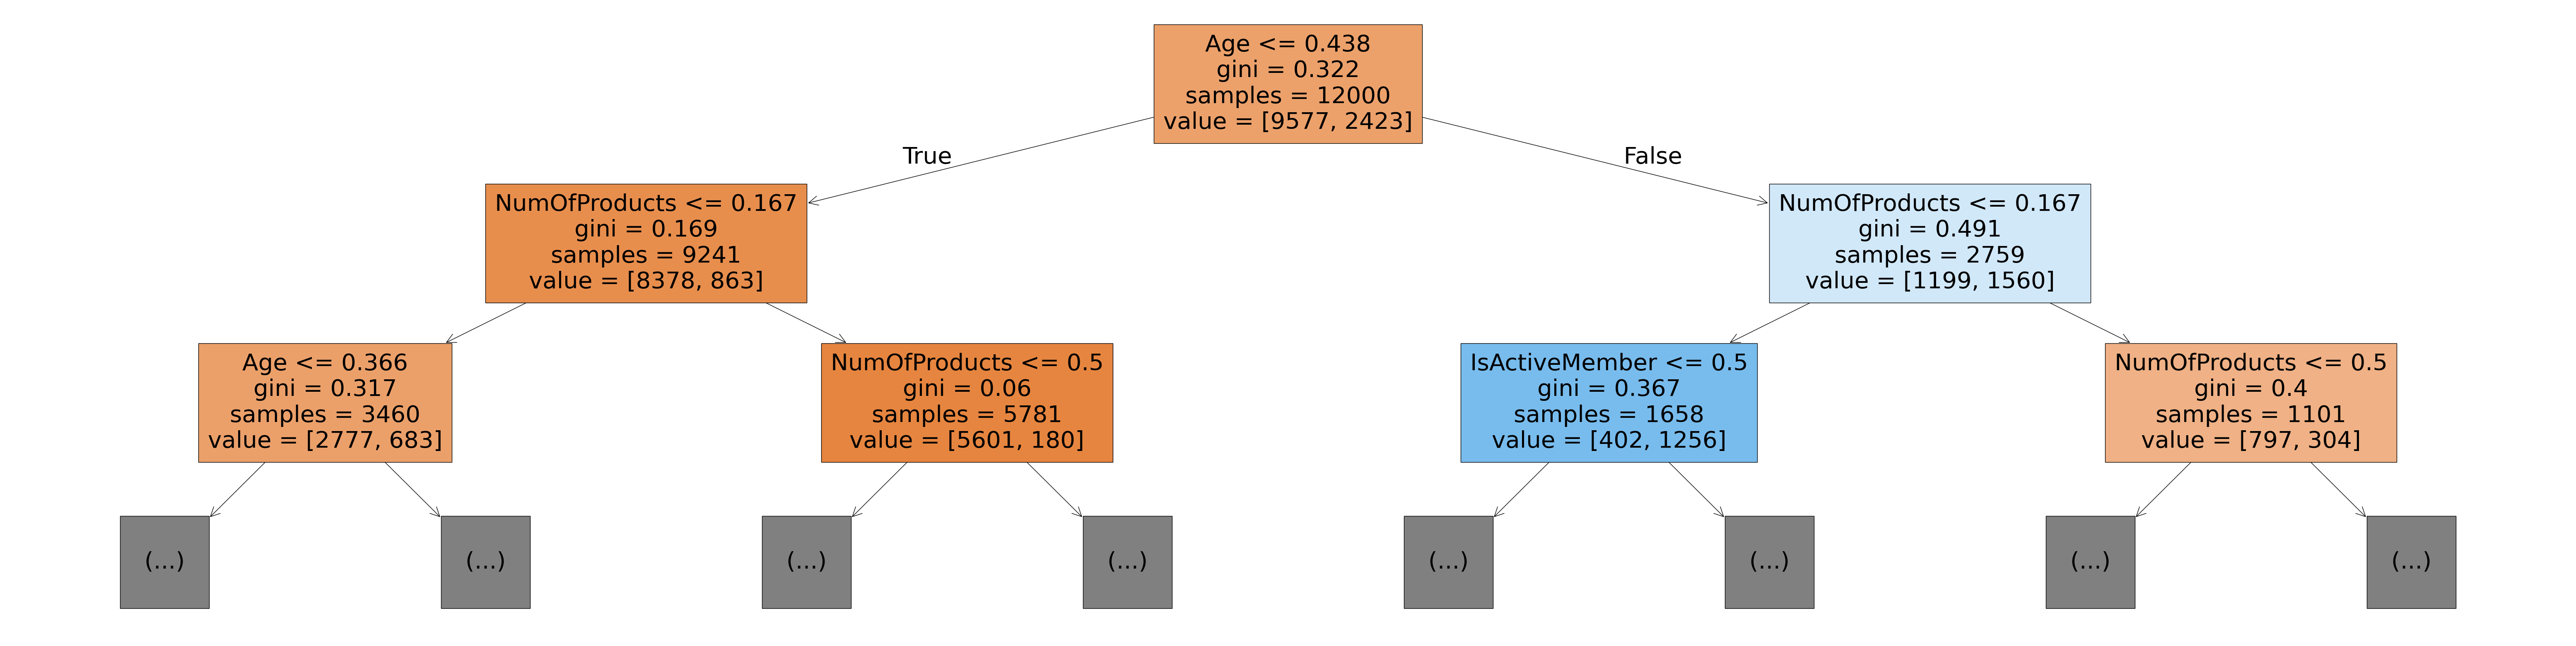

In [17]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, max_depth=2, filled=True);

Найвпливовіші ознаки: **Age, NumOfProducts**

##### 2.5. Створіть датафрейм importance_df з feature importances, де в першому стовпчику feature - назва ознаки з нашого Х, а в другому importance - значення, наскільки ця ознака є важливою в побудованій моделі. Виведіть топ 10 найвпливовіших ознак разом з їх скором важливості (можна або у вигляді таблиці, або в вигляді barplot).

In [18]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [19]:
importance_df.head(10).style.background_gradient()

,feature,importance
1,Age,0.337105
4,NumOfProducts,0.182204
7,EstimatedSalary,0.125594
0,CreditScore,0.112716
3,Balance,0.082301
2,Tenure,0.059615
6,IsActiveMember,0.035980
9,Geography_Germany,0.018989
11,Gender_Female,0.013740
5,HasCrCard,0.013250


**Висновок.** Як ми можемо бачити, дві найважливіші ознаки (**Age** та **NumOfProducts**) співпадають з двома ознаками, які зустрічаються на верхніх рівнях нашого дерева. Цікавим є те, що на третьому та четвертому місцях за важливістю є ознаки **EstimatedSalary** та **CreditScore**, які ми не бачимо на виведених рівнях (до глибини 2 включно). Так як наше дерево має глибину 25, скоріш ща все ці ознаки зустрічаються частіше на нижчих рівнях та кумулятивна важливість кожної з них досить висока.

**Завдання 3**. Спробуйте знайти такі параметри моделі `DecisionTree` аби модель генералізувала ліпше (був вищий показник AUROC на валідаційній вибірці). Проекспериментуйте з різними значеннями параметрів `max_leaf_nodes`, `max_depth` та лишіть ті, які дають найкращий результат, разом з відповідними AUROC на тренувальній і валідаційній вибірках.

В цьому завданні спробуйте просто знайти параметри методом "тика" :)

In [20]:
md, mln = 6, 40

model = DecisionTreeClassifier(max_depth = md, max_leaf_nodes = mln, random_state = 42)
model.fit(X_train, y_train)
compute_auroc(model, X_train, y_train, 'Training')
compute_auroc(model, X_val, y_val, 'Validation');

AUROC for Training: 	0.9319
AUROC for Validation: 	0.9153


**Завдання 4**. В циклі пройдіться по значенням max_depth від 1 до 20 включно, на кожній ітерації натренуйте DecisionTree модель і виміряйте AUROC на трейн і валідаційних даних.

В кінці виведіть на графік залеєність між AUROC на трейн і валідаційних даних і номером ітерації.

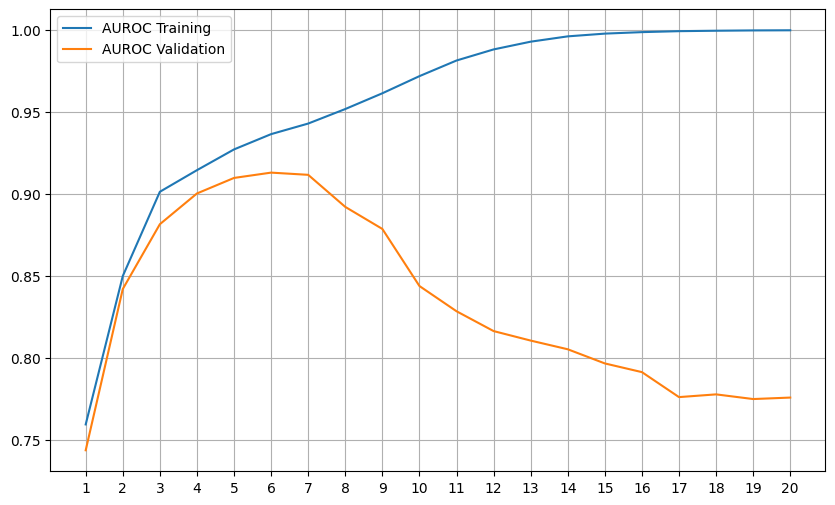

In [21]:
auroc_train = []
auroc_val = []

for i in range(1,21):
    model = DecisionTreeClassifier(max_depth = i, random_state = 42)
    model.fit(X_train, y_train)
    auroc_train_i = compute_auroc(model, X_train, y_train, '', False)
    auroc_train.append(auroc_train_i)
    auroc_val_i = compute_auroc(model, X_val, y_val, '', False)
    auroc_val.append(auroc_val_i)

auroc_df = pd.DataFrame({'max_depth': np.arange(1,21), 'AUROC_train': auroc_train, 'AUROC_val': auroc_val})

plt.figure(figsize = (10, 6))
plt.plot(auroc_df['max_depth'], auroc_df['AUROC_train'], label = 'AUROC Training')
plt.plot(auroc_df['max_depth'], auroc_df['AUROC_val'], label = 'AUROC Validation')
plt.xticks(auroc_df['max_depth'])
plt.legend()
plt.grid()
plt.show()

**Висновок.** Найвище значення AUROC для валідаційних даних ми спостерігаємо за max_depth = 6.

**Завдання 5**.
1. Натренуйте модель `DecisionTree` з найкращим значенням `max_depth`, яке ви знайшли на попередній ітерації.
2. Завантажте тестові дані змагання з `test.csv`.
3. Зробіть попередню обробку даних з функцією `preprocess_new_data` з вашого модуля `process_bank_churn.py`.
4. Зробіть передбачення використовуючи цю модель на тестових даних змагання.
5. Сформуйте `submission.csv`.
6. Зробіть новий Submission на Kaggle і додайте тут скріншот Вашого скору на паблік лідерборді :)


In [22]:
# Тренування моделі з найкращими значеннями max_depth та max_leaf_nodes
model_final = DecisionTreeClassifier(max_depth = 6, max_leaf_nodes = 40, random_state = 42)
model_final.fit(X_train, y_train)

compute_auroc(model_final, X_train, y_train, 'Training')
compute_auroc(model_final, X_val, y_val, 'Validation');

AUROC for Training: 	0.9319
AUROC for Validation: 	0.9153


**Передбачення для тестових даних**

In [23]:
# Завантаження тестових даних
test_df = pd.read_csv('test.csv')
test_df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15000,15594796.0,Chu,584.0,Germany,Male,30.0,2.0,146053.66,1.0,1.0,1.0,157891.86
1,15001,15642821.0,Mazzi,551.0,France,Male,39.0,5.0,0.00,2.0,1.0,1.0,67431.28
2,15002,15716284.0,Onyekachi,706.0,France,Male,43.0,8.0,0.00,2.0,1.0,0.0,156768.45
3,15003,15785078.0,Martin,717.0,Spain,Male,45.0,3.0,0.00,1.0,1.0,1.0,166909.87
4,15004,15662955.0,Kenechukwu,592.0,Spain,Male,43.0,8.0,0.00,2.0,1.0,1.0,143681.97


In [24]:
# Попередня обробка даних з функцією preprocess_new_data з вашого модуля process_bank_churn.py
from process_bank_churn import preprocess_new_data

In [25]:
?preprocess_new_data

Signature:
preprocess_new_data(
    raw_test_df: pandas.core.frame.DataFrame,
    scaler,
    encoder,
    scale_numeric: bool = True,
) -> Dict[str, pandas.core.frame.DataFrame]
Docstring:
Prepares the new test dataset by applying preprocessing steps such as column dropping,
feature scaling, and encoding.

Parameters:
raw_test_df (pd.DataFrame): The raw test dataset.
scale_numeric (bool): Whether to apply scaling to numeric features.
scaler (MinMaxScaler): The fitted scaler for numeric features.
encoder (OneHotEncoder): The fitted encoder for categorical features.

Returns:
Dict[str, pd.DataFrame]: A dictionary containing the processed test features under the key 'X_test'.
File:      c:\users\olsli\documents\01_data_science\02_machine_learning\ml_hanna_pylieva\2_supervised_ml\2_3_decision_trees\process_bank_churn.py
Type:      function

In [26]:
scaler = data['scaler']
scaler

MinMaxScaler()

In [27]:
encoder = data['encoder']
encoder

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [28]:
data_test = preprocess_new_data(test_df, scaler, encoder)
data_test

{'X_test':       CreditScore       Age  Tenure   Balance  NumOfProducts  HasCrCard  \
 0        0.365155  0.214286     0.2  0.696265       0.000000        1.0   
 1        0.286396  0.375000     0.5  0.000000       0.333333        1.0   
 2        0.656325  0.446429     0.8  0.000000       0.333333        1.0   
 3        0.682578  0.482143     0.3  0.000000       0.000000        1.0   
 4        0.384248  0.446429     0.8  0.000000       0.333333        1.0   
 ...           ...       ...     ...       ...            ...        ...   
 9995     0.496420  0.357143     1.0  0.000000       0.333333        1.0   
 9996     0.589499  0.375000     0.9  0.000000       0.333333        1.0   
 9997     0.818616  0.214286     0.9  0.000000       0.333333        1.0   
 9998     0.391408  0.357143     0.6  0.690650       0.000000        1.0   
 9999     0.546539  0.214286     0.3  0.000000       0.000000        1.0   
 
       IsActiveMember  EstimatedSalary  Geography_France  Geography_Germany 

In [29]:
# Передбачення за допомогою фінальної моделі
y_test = model_final.predict_proba(data_test['X_test'])[:, 1]
y_test

array([0.1638796 , 0.01256482, 0.16780822, ..., 0.01256482, 0.03781882,
       0.13307241], shape=(10000,))

In [30]:
df_to_submit = pd.read_csv('sample_submission.csv')
df_to_submit.head()

,id,Exited
0,15000,0.5
1,15001,0.5
2,15002,0.5
3,15003,0.5
4,15004,0.5


In [31]:
df_to_submit['Exited'] = y_test
df_to_submit.head()

,id,Exited
0,15000,0.163880
1,15001,0.012565
2,15002,0.167808
3,15003,0.677083
4,15004,0.082456


In [32]:
# Зберігаємо результат в файл submission_log_reg.csv
df_to_submit.to_csv('submission_log_reg.csv', index = False)

**Kaggle Late Submission**

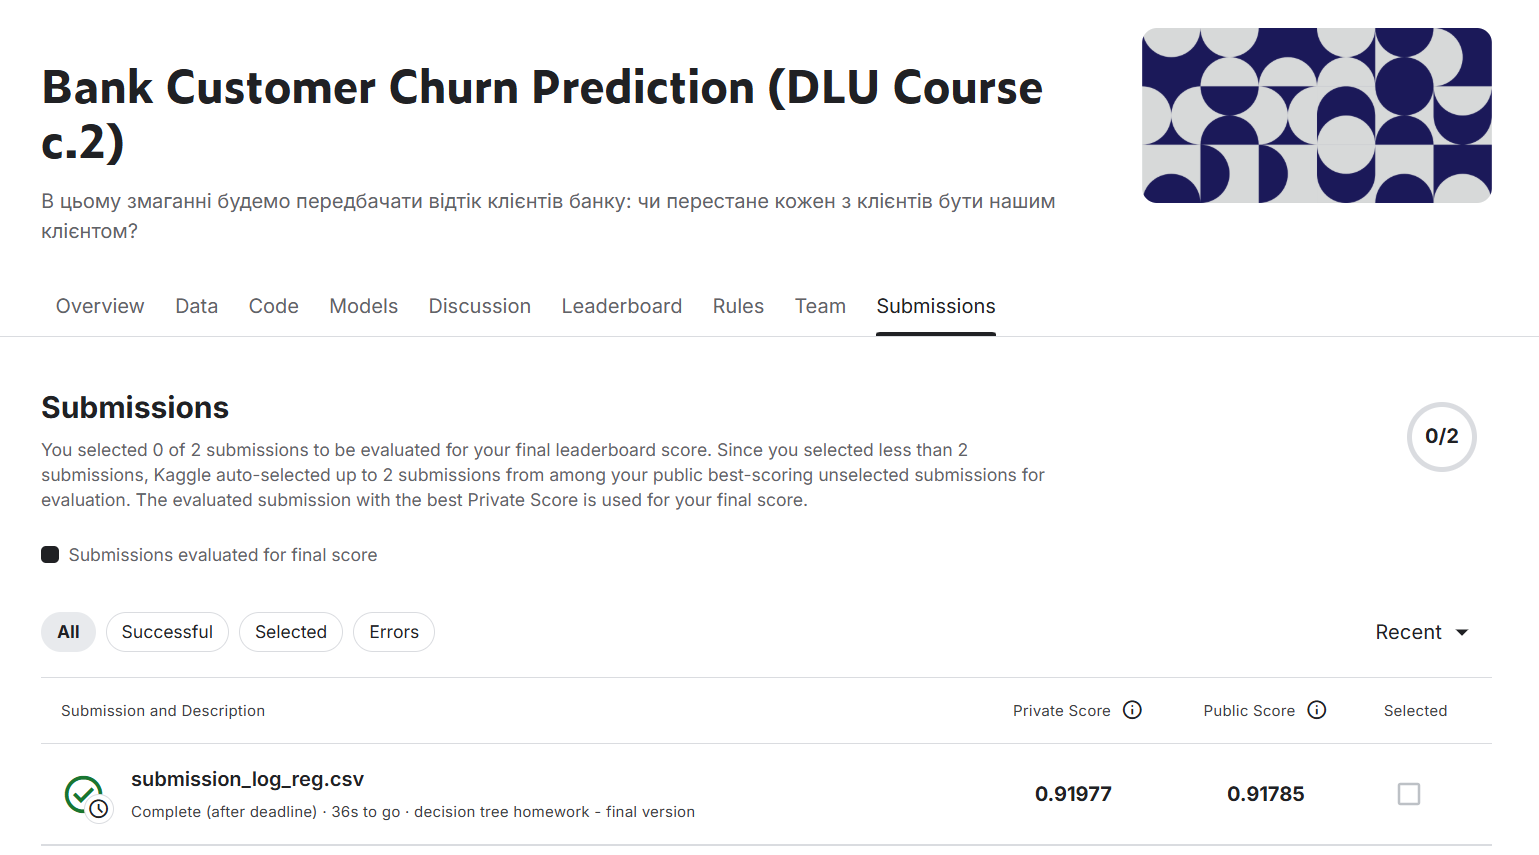